In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random


In [89]:
np.random.seed(0)

(X_train, y_train), (X_test, y_test) = mnist.load_data()


print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of images is not 28 x 28."
assert(X_test.shape[1:] == (28,28)), "The dimensions of images is not 28 x 28."

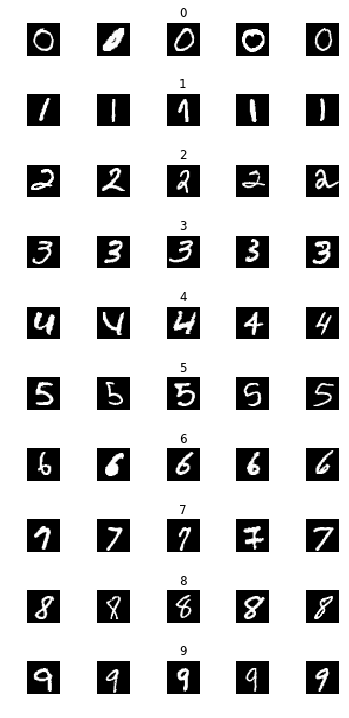

In [91]:
num_of_sample = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :] , cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(j)  
            num_of_sample.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

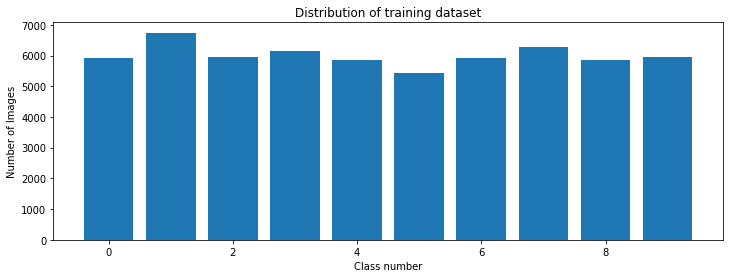

In [92]:
print(num_of_sample)
plt.figure(figsize = (12,4))
plt.bar(range(0, num_classes), num_of_sample)
plt.title("Distribution of training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of Images")


In [93]:
X_train = X_train.reshape(60000, 28, 28 ,1)
X_test = X_test.reshape(10000, 28, 28 ,1)


# One hot Encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Feature selection
X_train = X_train/255
X_test = X_test/255

# num_pixels = 784
# X_train = X_train.reshape(X_train.shape[0], num_pixels)
print(X_train.shape)
# X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
# Define the leNet_model function
def leNet_model():
  model= Sequential()
  model.add(Conv2D(30, (5, 5), input_shape = (28,28,1), activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
  return model 
  

In [95]:

model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
__________

In [96]:
h =model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 400, verbose = 1, shuffle = 1)



Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.2478 - acc: 0.9197 - val_loss: 0.0472 - val_acc: 0.9865
Epoch 2/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0710 - acc: 0.9777 - val_loss: 0.0349 - val_acc: 0.9902
Epoch 3/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0567 - acc: 0.9827 - val_loss: 0.0430 - val_acc: 0.9853
Epoch 4/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0530 - acc: 0.9835 - val_loss: 0.0367 - val_acc: 0.9885
Epoch 5/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0466 - acc: 0.9854 - val_loss: 0.0315 - val_acc: 0.9915
Epoch 6/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0452 - acc: 0.9860 - val_loss: 0.0315 - val_acc: 0.9920
Epoch 7/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0376 - acc: 0.9889 - val_loss: 0.0382 - val_acc:

Text(0.5, 0, 'epoch')

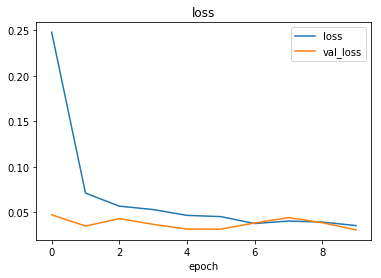

In [97]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss' , 'val_loss'])
plt.title("loss")
plt.xlabel("epoch")

Test Score :  0.02792269474294799
Test Accuracy :  0.9909


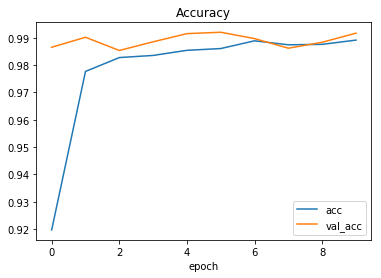

In [98]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc' , 'val_acc'])
plt.title("Accuracy")
plt.xlabel("epoch")

score = model.evaluate(X_test, y_test, verbose = 0)
print("Test Score : ", score[0])
print("Test Accuracy : ", score[1])

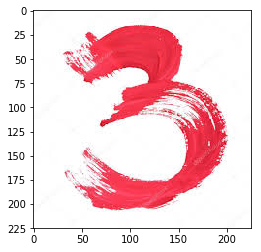

In [99]:
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)


In [100]:
img_array = np.asarray(img)

print(img_array.shape)

(225, 225, 3)


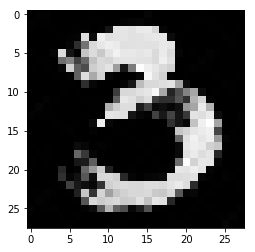

In [101]:
import cv2

img_array = np.asarray(img)
img = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap= plt.get_cmap("gray"))




In [0]:
image = image/255
image = image.reshape(1, 28, 28, 1)



In [103]:
prediction = model.predict_classes(image)
print("Predicted image : " ,prediction)

Predicted image :  [3]


In [104]:
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test Score : " , score[0])
print("Test Accuracy : ", score[1])

Test Score :  0.02792269474294799
Test Accuracy :  0.9909


In [105]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs= model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)


(1, 24, 24, 30)
(1, 10, 10, 15)


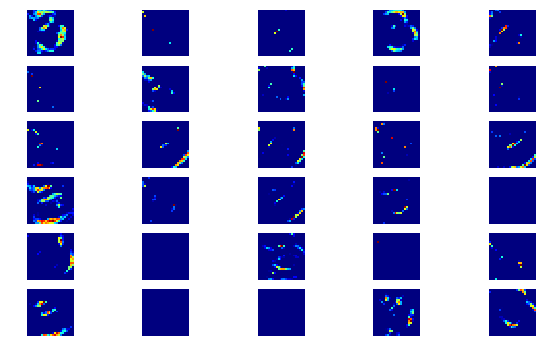

In [107]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis("off")

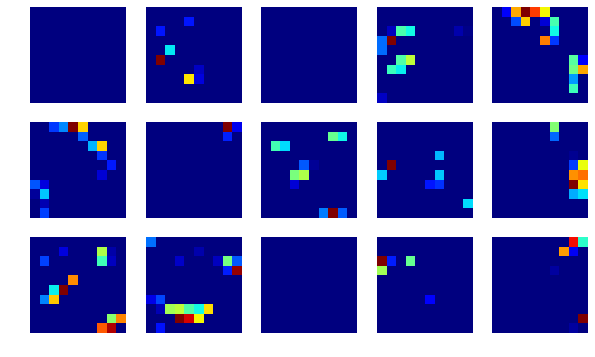

In [108]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis("off")